<a href="https://colab.research.google.com/github/Anand1923/DSA_Assignments/blob/main/Case_Study_07_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Case Study 07- Supervised Learning


In [ ]:
#Importing lib
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

reading dataset

In [5]:
data=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/iris_ANOVA.xlsx')

In [7]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# Columns
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

**Preprocessing**

In [12]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [9]:
data.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values in the data set which will cause hindrance for model. Which needs to be removed

In [13]:
data.ffill(inplace=True)

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Encoding the data 

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification']= le.fit_transform(data['Classification'])

Checking Outliers

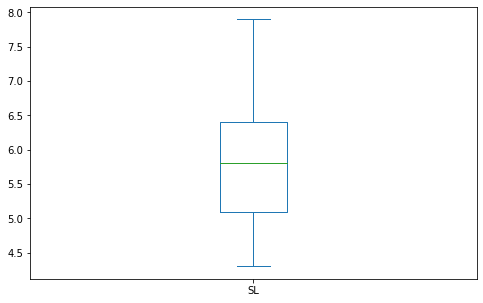

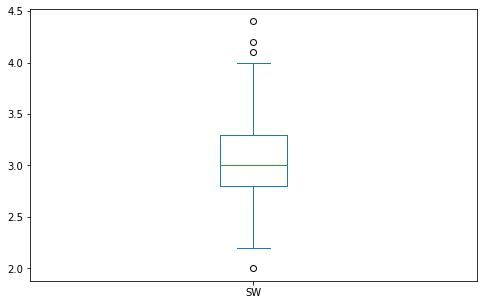

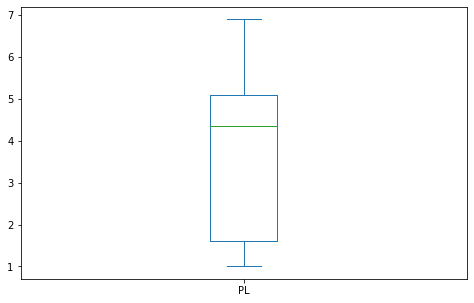

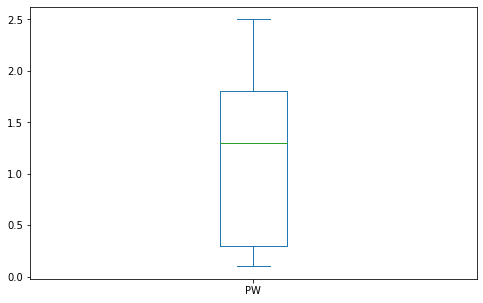

In [17]:
# boxplot before removing the outliers from SL, SW, PL and PW features
for i in data.columns[data.dtypes == float]:
   fig = plt.figure(figsize=(8,5))
   data[i].plot(kind='box')
  

There are outliers for feature-SW
It need to be removed

In [30]:
# Removing Outliers
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')


IQR = Q3 - Q1
low = Q1-1.5*IQR
upp = Q3+1.5*IQR


 #Outilers
outliers = []
for i in data['SW']:
  if((i>upp)or(i<low)):
    outliers.append(i)

print("Outliers in the Sepal Width: ",outliers)

Outliers in the Sepal Width:  [3.9, 4.0, 3.9]


In [31]:
# select the index of these outliers
index_min = data['SW']<low
lower_outlier = data.loc[index_min].index

index_upp = data['SW']>upp
upper_outlier= data.loc[index_upp].index

In [32]:
# drop these index for removing outliers
data.drop(lower_outlier, inplace=True)
data.drop(upper_outlier, inplace=True)

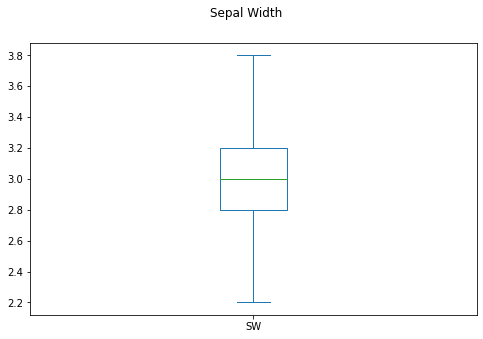

In [33]:
# boxplot after removing the outliers from Sepal Width feature
fig = plt.figure(figsize=(8,5))
data['SW'].plot(kind='box')
fig.suptitle('Sepal Width')
plt.show()

Outliers are removed

**Checking correlation between features**

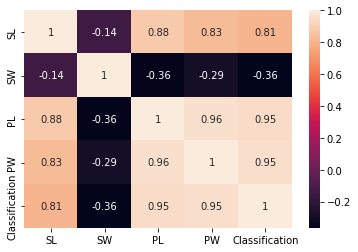

In [34]:
cm=data.corr()
sns.heatmap(cm,annot=True)

There is a high correlation between PW and PL any one can be removed

**Splitting the data into target and features**

In [35]:
x=data.drop(['Classification','PW'],axis=1)
y=data['Classification']

training data and testing data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fitting the standard scaling on both X_train and y_train
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

#logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      1.00      0.92        11
           2       1.00      0.85      0.92        13

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [50]:
confusion_matrix(y_test,predictions)

array([[12,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 11]])

In [51]:
accuracy_score(y_test, predictions)

0.9444444444444444

#Random forest algorithm

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.85      1.00      0.92        11
           2       1.00      0.85      0.92        13

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [54]:

accuracy_score(y_test, y_pred)

0.9444444444444444

#K-Nearest Neighbors(KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = [] #find the optimum k values
neighbors = np.arange(3,15)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
  classifier.fit(X_train,y_train)
  y_pred = classifier.predict(X_test)
  acc = accuracy_score(y_test,y_pred) # find the maximum accuracy
  acc_values.append(acc)


Text(0, 0.5, 'accuracy')

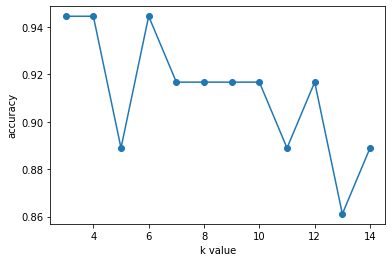

In [56]:
plt.plot(neighbors, acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [57]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



In [59]:
accuracy_score(y_test, y_pred)

0.9444444444444444

#Decision Trees

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.92      0.92      0.92        13

    accuracy                           0.94        36
   macro avg       0.94      0.94      0.94        36
weighted avg       0.94      0.94      0.94        36



In [62]:
accuracy_score(y_test, y_pred)

0.9444444444444444

#**Conclusion**
All the models are giving us a good accuracy of 94%. Which is very good. So any of the model can be used for prediction